In [1]:
from sklearn.datasets import fetch_openml
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


mnist = fetch_openml("mnist_784", as_frame=False)



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

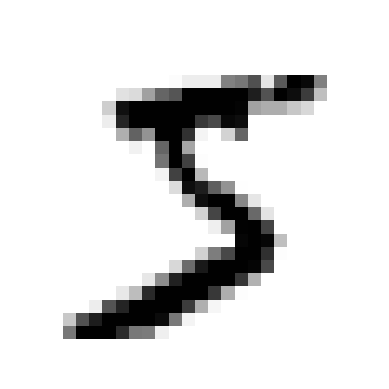

'5'

In [2]:
import matplotlib.pyplot as plt

X, y = mnist.data, mnist.target

X

y

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()
y[0]

# Deler opp dataen i de ulike treningsettene og testsettene

X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")


In [3]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])



SGDClassifier(random_state=42)

array([ True])

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")




array([0.95035, 0.96035, 0.9604 ])

DummyClassifier()

False


array([0.90965, 0.90965, 0.90965])

In [5]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[53892,   687],
       [ 1891,  3530]])

array([[54579,     0],
       [    0,  5421]])

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
f1_score(y_train_5, y_train_pred)

y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


0.8370879772350012

0.6511713705958311

0.7325171197343847

array([2164.22030239])

array([ True])

array([False])

In [8]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


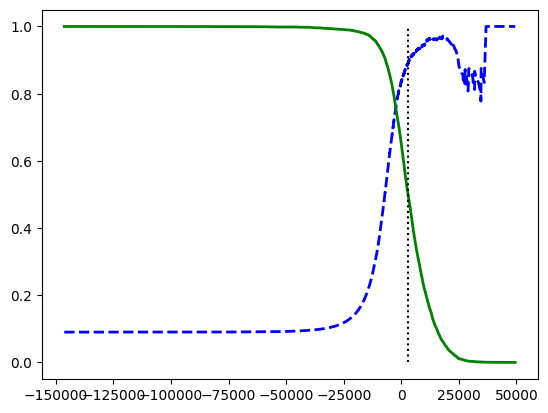

In [9]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "-g", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.show()


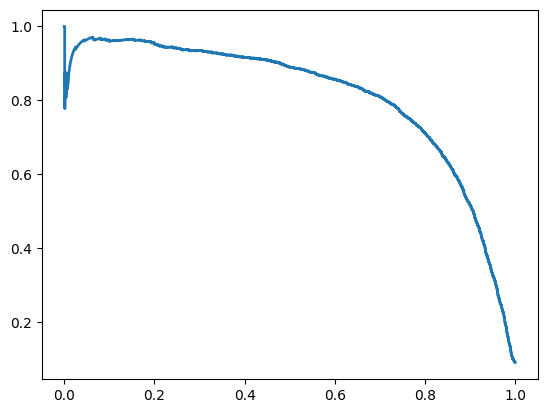

In [10]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [11]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [12]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

precision_score(y_train_5, y_train_pred_90)
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.9000345901072293

0.4799852425751706

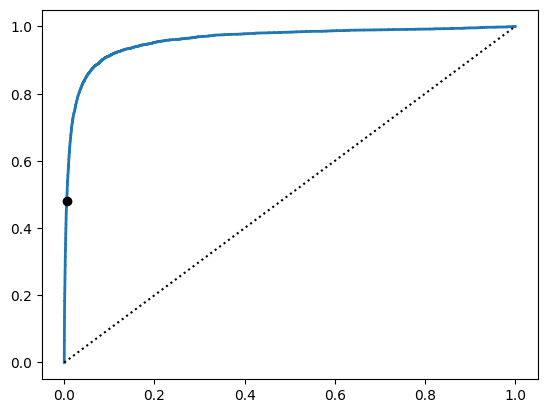

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1], [0, 1], "k:", label="Random classifiers's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

Text(0, 0.5, 'Precision')

Text(0.5, 0, 'Recall')

(0.0, 1.05)

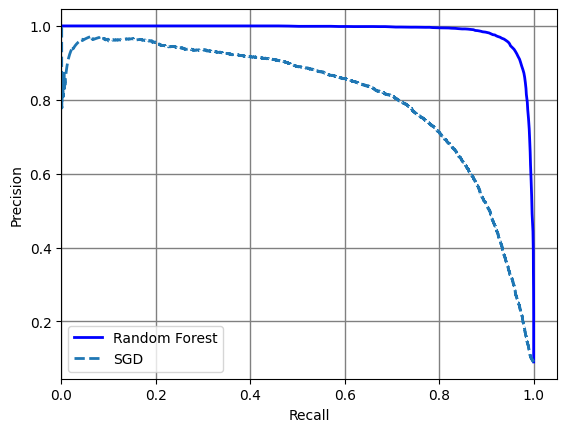

In [26]:
y_scores_forest = y_probas_forest[:, 1]
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.plot(recalls_forest, precision_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.grid(True, color="grey", linewidth=1)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.xlim(left=0)
plt.legend()
plt.show()

In [28]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)
roc_auc_score(y_train_5, y_scores_forest)

0.9274509803921569

np.float64(0.9983436731328145)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [35]:
svm_clf.predict([some_digit])

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)
class_id = some_digit_scores.argmax()
class_id

svm_clf.classes_

array(['5'], dtype=object)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

np.int64(5)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)